In [ ]:
import pandas as pd
import numpy as np
import spacy

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz (15.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Using cached thinc-8.1.12-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
Using cached spacy-3.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.4 MB)
Using cached thinc-8.1.12-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (917 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follow

<ipython-input-2-b0c9599b7f45>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("medical_specialty").apply(lambda x: x.sample(n=min(len(x), 50), random_state=42)).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


Classification Report:
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       1.00      0.75      0.86         4
    Cardiovascular / Pulmonary       0.10      0.10      0.10        10
                  Chiropractic       0.00      0.00      0.00         3
    Consult - History and Phy.       0.15      0.20      0.17        10
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         5
                     Dentistry       0.57      0.80      0.67         5
                   Dermatology       0.50      0.50      0.50         6
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       0.12      0.10      0.11        10
          ENT - Otolaryngology       0.25      0.30      0.27        10
        Emergency Room Reports       0.5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


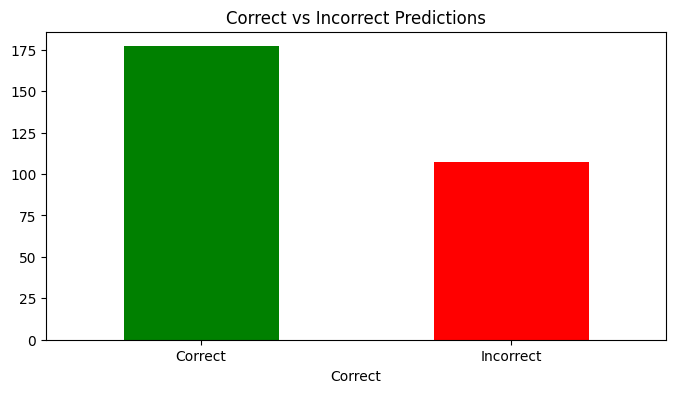

In [ ]:
# Install required libraries
!pip install scispacy spacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz

import pandas as pd
import spacy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Load dataset (upload mtsamples.csv in Colab)
df = pd.read_csv('mtsamples.csv')

# Drop rows with missing values
df = df.dropna(subset=["description", "medical_specialty"])

# Optional: Sample to balance classes for demo
df = df.groupby("medical_specialty").apply(lambda x: x.sample(n=min(len(x), 50), random_state=42)).reset_index(drop=True)

# Load SciSpaCy model
nlp = spacy.load("en_core_sci_sm")

# Extract named entities from the clinical text
def extract_entities(text):
    doc = nlp(text)
    return " ".join([ent.text for ent in doc.ents])

# Apply entity extraction
df["entities"] = df["description"].apply(extract_entities)

# TF-IDF feature extraction on entities
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df["entities"])
y = df["medical_specialty"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# View some predictions
sample_preds = pd.DataFrame({
    "True": y_test,
    "Predicted": y_pred
}).reset_index(drop=True)

print("\nSample Predictions:")
print(sample_preds.head())

# Visualize prediction distribution
sample_preds["Correct"] = sample_preds["True"] == sample_preds["Predicted"]
plt.figure(figsize=(8, 4))
sample_preds["Correct"].value_counts().plot(kind="bar", color=["green", "red"])
plt.title("Correct vs Incorrect Predictions")
plt.xticks([0, 1], ["Correct", "Incorrect"], rotation=0)
plt.show()


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_med7_lg-0.5.1.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz (15.9 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.1-py3-none-any.whl size=120217626 sha256=6d3a021a2d3b1cd0e49a4826e8caa8e9e3379f0c36217b40ded48165537a0778
  Stored in directory: /root/.cache/pip/wheels/b4/8d/fb/36403b97e0de3d4c3f81c95f9d22c423d90f542243a35d5350
Successfully built en_ner_bc5cdr_md
  ERROR: HTTP error 404 while getting https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_med7_lg-0.5.1.tar.gz
ERROR: Could not install requirement https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_med7_lg-0.5.1.tar.gz because of HTTP error 404 Client Error: Not Found for url: https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core

In [ ]:
# Step 1: Install required libraries
!pip install scispacy spacy xgboost sklearn matplotlib

# Step 2: Download the sciSpaCy model
!pip install https://huggingface.co/allenai/scispacy/resolve/main/en_core_sci_sm-0.5.1.tar.gz
import spacy
nlp = spacy.load("en_core_sci_sm")


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
User for huggingface.co:   ERROR: Operation cancelled by user


/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


In [ ]:
# Step 3: Import other required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns


In [ ]:
# Step 4: Load the dataset (Upload mtsamples.csv manually via the sidebar)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("mtsamples.csv")
df = df[["description", "medical_specialty"]].dropna()
df = df[df["medical_specialty"] != " "]
df.reset_index(drop=True, inplace=True)
df.head()


Saving mtsamples.csv to mtsamples (1).csv


,description,medical_specialty
0,A 23-year-old white female presents with comp...,Allergy / Immunology
1,Consult for laparoscopic gastric bypass.,Bariatrics
2,Consult for laparoscopic gastric bypass.,Bariatrics
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary
4,2-D Echocardiogram,Cardiovascular / Pulmonary


In [ ]:
# Step 5: Extract Named Entities using SciSpaCy
def extract_entities(text):
    doc = nlp(text)
    return " ".join([ent.text for ent in doc.ents])

print("Extracting entities... (This may take 2-5 minutes)")
df["entities"] = df["description"].apply(extract_entities)
df.head()


Extracting entities... (This may take 2-5 minutes)


,description,medical_specialty,entities
0,A 23-year-old white female presents with comp...,Allergy / Immunology,white female complaint allergies
1,Consult for laparoscopic gastric bypass.,Bariatrics,Consult laparoscopic gastric bypass
2,Consult for laparoscopic gastric bypass.,Bariatrics,Consult laparoscopic gastric bypass
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,
4,2-D Echocardiogram,Cardiovascular / Pulmonary,


In [ ]:
# Step 6: Prepare features and labels
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df["entities"])
y = df["medical_specialty"]

# Optional: Reduce number of classes to top 10 for speed in Colab
top_specialties = y.value_counts().nlargest(10).index.tolist()
df_filtered = df[df["medical_specialty"].isin(top_specialties)]
X = tfidf.transform(df_filtered["entities"])
y = df_filtered["medical_specialty"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Step 6.1: Encode labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Step 7: Train XGBoost Classifier with Hyperparameter Tuning
params = {
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.3],
    'eval_metric': ['mlogloss']
}

grid = GridSearchCV(XGBClassifier(), param_grid=params, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train_encoded)

best_model = grid.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Classification Report:
                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.31      0.23      0.26        74
    Consult - History and Phy.       0.31      0.39      0.35       103
              Gastroenterology       0.05      0.02      0.03        46
              General Medicine       0.21      0.10      0.13        52
                     Neurology       0.25      0.09      0.13        45
       Obstetrics / Gynecology       0.19      0.09      0.12        32
                    Orthopedic       0.16      0.10      0.12        71
                     Radiology       0.17      0.07      0.10        55
 SOAP / Chart / Progress Notes       0.30      0.09      0.14        33
                       Surgery       0.37      0.66      0.48       221

                      accuracy                           0.31       732
                     macro avg       0.23      0.18      0.19       732
                  weighted avg       0.

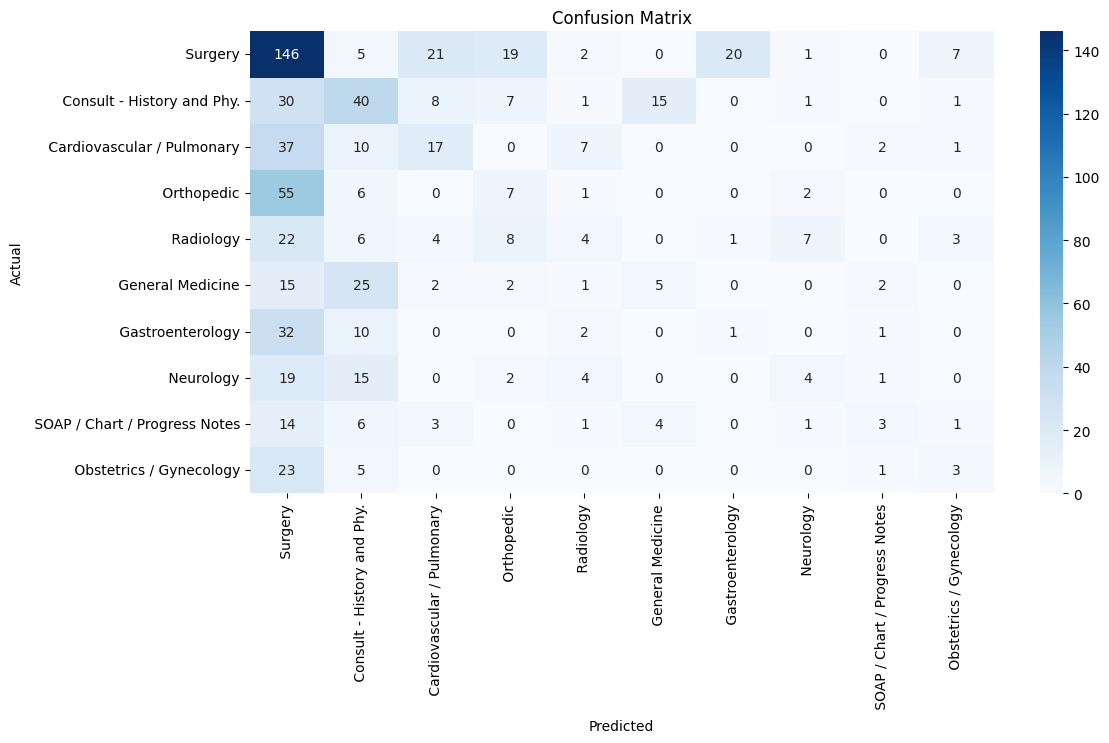

In [ ]:
# Step 8: Evaluate the model
y_pred = best_model.predict(X_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))

# Confusion Matrix
plt.figure(figsize=(12, 6))
cm = confusion_matrix(y_test, y_pred_decoded, labels=top_specialties)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=top_specialties, yticklabels=top_specialties, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install -U transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

Map:   0%|          | 0/2095 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/524 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-34-10b77f48dab2>:68: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,No log,0.725071
2,0.728200,0.740617



Classification Report:

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.32      0.27      0.29        74
 Consult - History and Phy.       0.75      0.71      0.73       103
                 Orthopedic       0.37      0.52      0.43        71
                  Radiology       0.57      0.49      0.53        55
                    Surgery       0.71      0.70      0.71       221

                   accuracy                           0.60       524
                  macro avg       0.55      0.54      0.54       524
               weighted avg       0.60      0.60      0.60       524



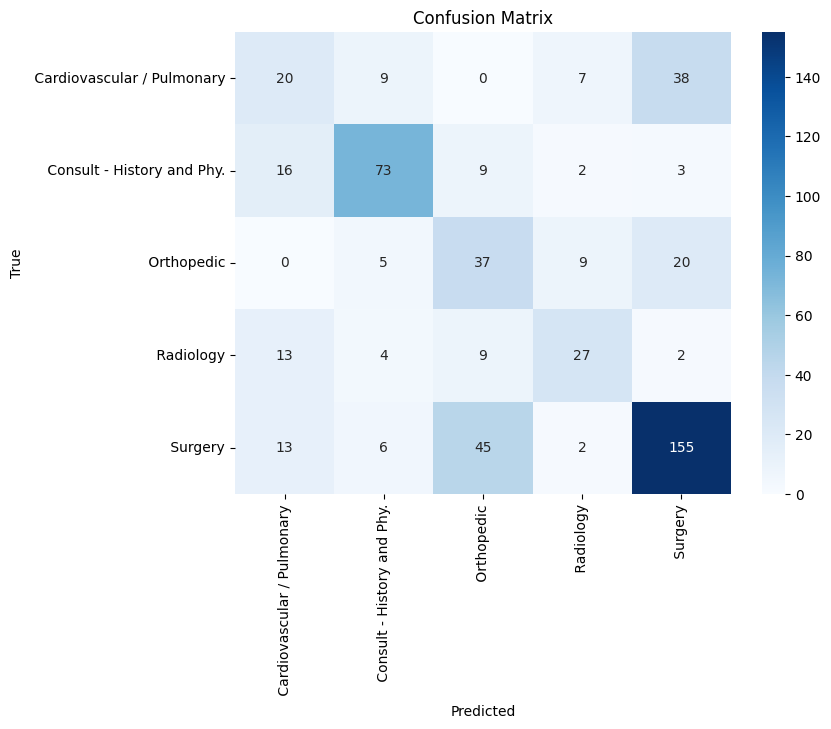


Predicted Specialty for Example:  Cardiovascular / Pulmonary


In [ ]:
# Install required libraries
!pip install -q transformers datasets scikit-learn pandas matplotlib seaborn

# Imports
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset, Features, Value, ClassLabel
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("mtsamples.csv")  # Ensure this is uploaded in Colab
df = df[["description", "medical_specialty"]].dropna()

# Filter top 5 most common specialties
top_labels = df["medical_specialty"].value_counts().nlargest(5).index.tolist()
df = df[df["medical_specialty"].isin(top_labels)].reset_index(drop=True)

# Encode Labels
label_enc = LabelEncoder()
df["label"] = label_enc.fit_transform(df["medical_specialty"])
labels = label_enc.classes_

# Convert to Hugging Face Dataset
# Define features with 'label' as ClassLabel
features = Features({
    'description': Value('string'),
    'medical_specialty': Value('string'),
    'label': ClassLabel(names=labels.tolist())
})

dataset = Dataset.from_pandas(df[["description", "medical_specialty", "label"]], features=features)

# Load Tokenizer and Tokenize
tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")

def tokenize_func(example):
    return tokenizer(example["description"], truncation=True)

dataset = dataset.train_test_split(test_size=0.2, stratify_by_column="label")
tokenized_ds = dataset.map(tokenize_func, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Load Model
model = AutoModelForSequenceClassification.from_pretrained(
    "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext",
    num_labels=len(labels)
)

# Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    report_to="none"
)

# Trainer Setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["test"],
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Train Model
trainer.train()

# Evaluation
preds = trainer.predict(tokenized_ds["test"])
y_pred = preds.predictions.argmax(axis=1)
y_true = tokenized_ds["test"]["label"]

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Optional: Inference on custom note
example = "Patient presents with persistent chest pain and shortness of breath. History of hypertension."
inputs = tokenizer(example, return_tensors="pt", truncation=True)
outputs = model(**inputs)
pred_label = torch.argmax(outputs.logits, axis=1).item()
print(f"\nPredicted Specialty for Example: {labels[pred_label]}")